# Project:- Breast Cancer Classification Python Project
Organization:- Infopillar Solution 

#  Data Science Internship
Author:- Arshad R. Bagde

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)

import seaborn as sns
import matplotlib.pyplot as plt

## Exploratory Data Analysis (EDA)

### Introductory Details

In [2]:
# read the csv file
df = pd.read_csv('breast-cancer.csv')

In [3]:
# print the number of rows and the number of columns
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

The dataset has 569 rows and 32 columns.


In [4]:
# exhibit the first ten observations
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# exhibit the bottom ten observations
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [6]:
# show the data types
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

### Data Cleaning

#### Missing Values

In [7]:
# count the number of missing values
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
# count the number of duplicate rows
df.duplicated().sum()

0

In [9]:
# drop the id column
df.drop(columns='id', inplace=True)

### Descriptive Statistics

#### Target Variable

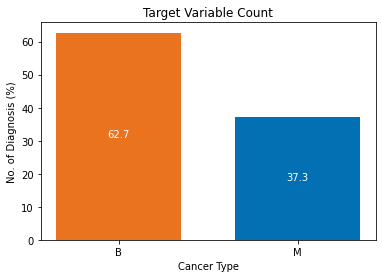

The benign cancers represent 62.7% of the cases
The malignant cancers represent 37.3% of the cases



In [10]:
labels = df['diagnosis'].value_counts().index.tolist()
values = np.round((df['diagnosis'].value_counts(normalize=True)*100), 1).to_list()

# creating the bar plot
plt.bar(labels, 
        values, 
        color = ['#e9731f', '#0470b4'],
        width = 0.7)

plt.xlabel("Cancer Type")
plt.ylabel("No. of Diagnosis (%)")
plt.title("Target Variable Count")

# add the value on each bar
for i in range(len(values)):
        plt.text(i, values[i]//2, values[i], ha='center', color='white')

plt.show()

print(f'The benign cancers represent {values[0]}% of the cases')
print(f'The malignant cancers represent {values[1]}% of the cases')
print()

#### Independent Variables

In [11]:
# exhibit some basic descriptive statistics
df.describe().round(4)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.0000,569.0000,569.000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000
mean,14.1273,19.2896,91.969,654.8891,0.0964,0.1043,0.0888,0.0489,0.1812,0.0628,0.4052,1.2169,2.8661,40.3371,0.0070,0.0255,0.0319,0.0118,0.0205,0.0038,16.2692,25.6772,107.2612,880.5831,0.1324,0.2543,0.2722,0.1146,0.2901,0.0839
std,3.5240,4.3010,24.299,351.9141,0.0141,0.0528,0.0797,0.0388,0.0274,0.0071,0.2773,0.5516,2.0219,45.4910,0.0030,0.0179,0.0302,0.0062,0.0083,0.0026,4.8332,6.1463,33.6025,569.3570,0.0228,0.1573,0.2086,0.0657,0.0619,0.0181
min,6.9810,9.7100,43.790,143.5000,0.0526,0.0194,0.0000,0.0000,0.1060,0.0500,0.1115,0.3602,0.7570,6.8020,0.0017,0.0023,0.0000,0.0000,0.0079,0.0009,7.9300,12.0200,50.4100,185.2000,0.0712,0.0273,0.0000,0.0000,0.1565,0.0550
25%,11.7000,16.1700,75.170,420.3000,0.0864,0.0649,0.0296,0.0203,0.1619,0.0577,0.2324,0.8339,1.6060,17.8500,0.0052,0.0131,0.0151,0.0076,0.0152,0.0022,13.0100,21.0800,84.1100,515.3000,0.1166,0.1472,0.1145,0.0649,0.2504,0.0715
50%,13.3700,18.8400,86.240,551.1000,0.0959,0.0926,0.0615,0.0335,0.1792,0.0615,0.3242,1.1080,2.2870,24.5300,0.0064,0.0204,0.0259,0.0109,0.0187,0.0032,14.9700,25.4100,97.6600,686.5000,0.1313,0.2119,0.2267,0.0999,0.2822,0.0800
75%,15.7800,21.8000,104.100,782.7000,0.1053,0.1304,0.1307,0.0740,0.1957,0.0661,0.4789,1.4740,3.3570,45.1900,0.0081,0.0324,0.0420,0.0147,0.0235,0.0046,18.7900,29.7200,125.4000,1084.0000,0.1460,0.3391,0.3829,0.1614,0.3179,0.0921
max,28.1100,39.2800,188.500,2501.0000,0.1634,0.3454,0.4268,0.2012,0.3040,0.0974,2.8730,4.8850,21.9800,542.2000,0.0311,0.1354,0.3960,0.0528,0.0790,0.0298,36.0400,49.5400,251.2000,4254.0000,0.2226,1.0580,1.2520,0.2910,0.6638,0.2075


In [12]:
# split the dataset into 3 dataframes
df_mean = df.iloc[:, 1:11]
df_se = df.iloc[:, 11:21]
df_worst = df.iloc[:, 21:]

# extract the target variable
y = df['diagnosis']

#### Data Distribution

In [13]:
def min_max_scaler(df: pd.DataFrame) -> pd.DataFrame:
    """
    Transform features by scaling each feature to a range from 0 to 1.
    """
    minimum = df.min()
    
    df = (df - minimum) / (df.max() - minimum)
    
    return df

def df_melter(y: pd.Series, df: pd.DataFrame) -> pd.DataFrame:
    """
    Modify the selected columns of a DataFrame from wide to long format.
    """
    df = pd.concat([y, df], axis=1)

    return pd.melt(df, id_vars='diagnosis', var_name='features', value_name='value')

def subplot_generator(df: pd.DataFrame, plot: str, y=None) -> None:
    """
    Prepare the main plot to be filled out with subplots.
    """
    df = min_max_scaler(df)

    fig, axes = plt.subplots(2, 5, figsize=(16, 12), sharey=True)
    fig.tight_layout(pad=3.0)
    axes = axes.flatten()

    plot_feature(df, plot, axes, y)
    
def plot_feature(df: pd.DataFrame, plot: str, axes, y=None) -> None:
    """
    Create the selected plot for each future in the DataFrame.
    """
    for i, feature in enumerate(df.columns):
        if plot == 'histogram':
            histoplot(df, feature, i, axes)
        elif plot == 'violinplot':
            violinplot(df, y, feature, i, axes)
        elif plot == 'swarmplot':
            swarmplot(df, y, feature, i, axes)
        elif plot == 'boxplot':
            boxplot(df, y, feature, i, axes)


def histoplot(df: pd.DataFrame, feature: str, i: int, axes) -> None:
    """
    Prepare the several histograms to enter the main plot.
    """

    bin_count = int(np.ceil(np.log2(len(df))) + 1)

    sns.histplot(ax=axes[i],
                data=df,
                x=feature,
                bins=bin_count,
                kde=True,
                line_kws={'lw': 3})

    plot_polishing(axes=axes, i=i, plot='histogram')

def violinplot(df: pd.DataFrame, y: pd.Series, feature: str, i: int, axes) -> None:
    """
    Prepare the several violinplots to enter the main plot.
    """

    df = df_melter(y, df)

    sns.violinplot(ax=axes[i],
                data=df[df['features'] == feature],
                x='features', 
                y='value', 
                hue='diagnosis',
                split=True)

    plot_polishing(axes=axes, i=i, plot='violinplot')

def swarmplot(df: pd.DataFrame, y: pd.Series, feature: str, i: int, axes) -> None:
    """
    Prepare the several swarmplots to enter the main plot.
    """
    
    df = df_melter(y, df)

    sns.swarmplot(ax=axes[i],
                data=df[df['features'] == feature],
                x='features', 
                y='value', 
                hue='diagnosis',
                size=3)
    
    plot_polishing(axes=axes, i=i, plot='swarmplot')

def boxplot(df: pd.DataFrame, y: pd.Series, feature: str, i: int, axes) -> None:
    """
    Prepare the several swarmplots to enter the main plot.
    """

    sns.boxplot(ax=axes[i],
                data=df,
                x=feature,
                orient='v',
                width=0.3,
                flierprops={'marker' : 'x',
                            'markeredgecolor' : 'red', 
                            'markersize' : 6})
    
    plot_polishing(axes=axes, i=i, plot='histogram')


def plot_polishing(axes, i: int, plot: str) -> None:
    """
    Eliminate the clutter from the plots. 
    """
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['left'].set_visible(False)
    axes[i].get_yaxis().set_visible(False)

    if plot in {'boxplot', 'histogram'}:
        axes[i].set(ylabel='')
        axes[i].set_xticks([])
    else:
        axes[i].get_legend().remove()
        axes[i].set(xlabel='', ylabel='')

##### Histograms

In [14]:
# ceiling the result of the logarithm ensures the result to be an integer
bin_count = int(np.ceil(np.log2(len(df))) + 1)

print(f'Number of bins according to Sturge\'s rule: {bin_count}')

Number of bins according to Sturge's rule: 11


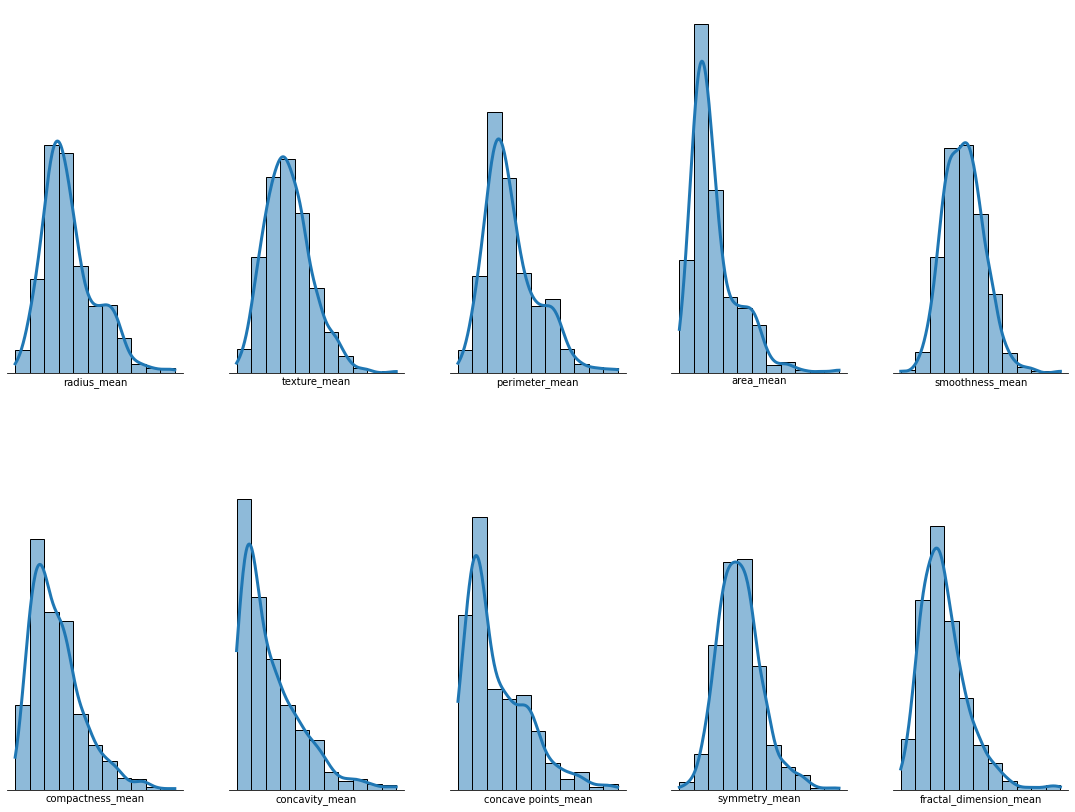

In [15]:
# plot the histograms
subplot_generator(df=df_mean, plot='histogram')

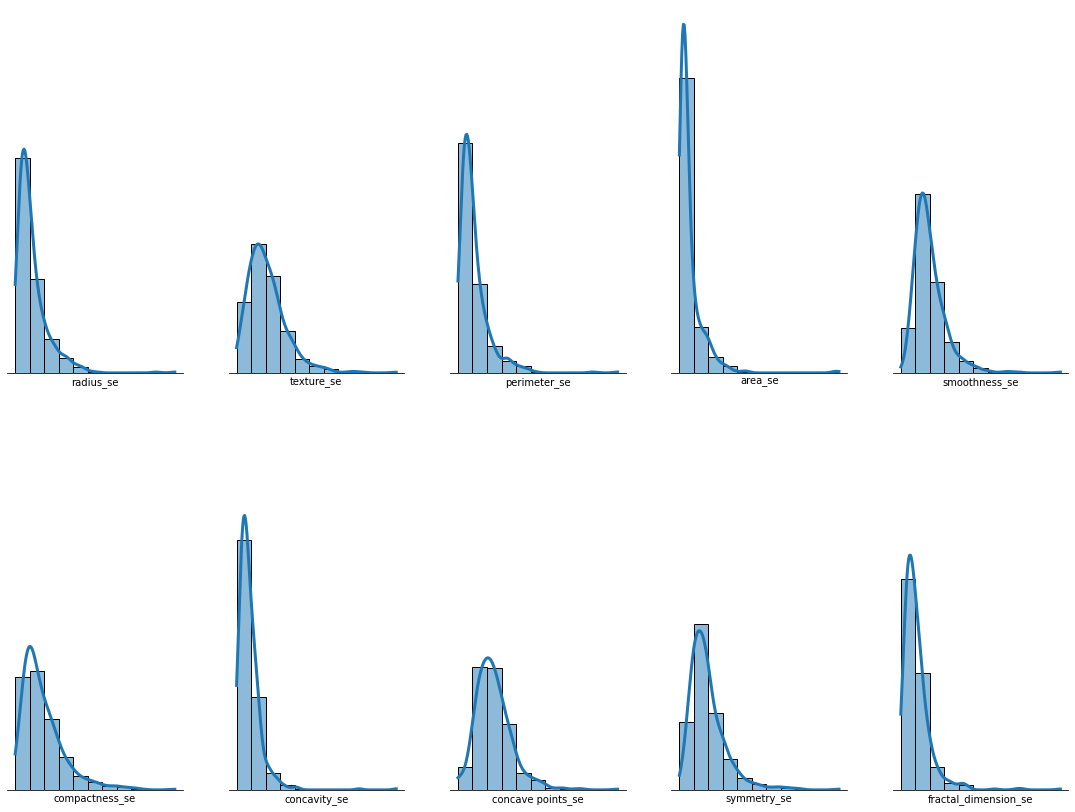

In [16]:
# plot the histograms
subplot_generator(df=df_se, plot='histogram')

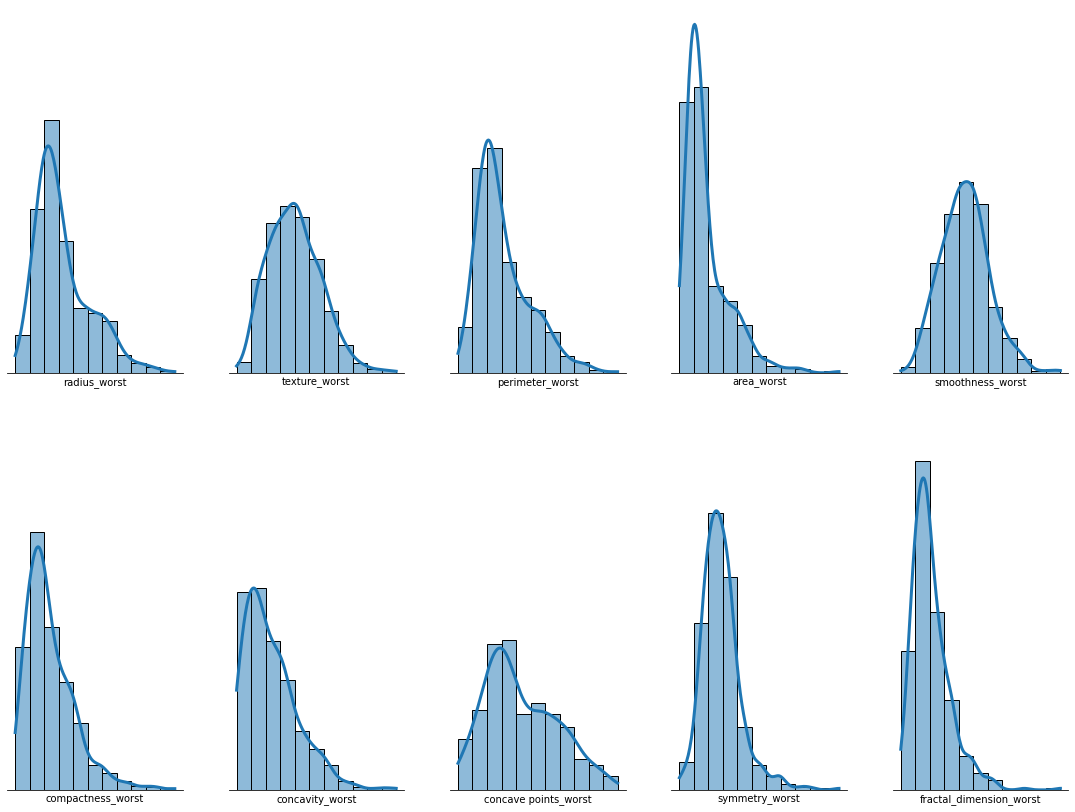

In [17]:
# plot the histograms
subplot_generator(df=df_worst, plot='histogram')

##### Violin Plot

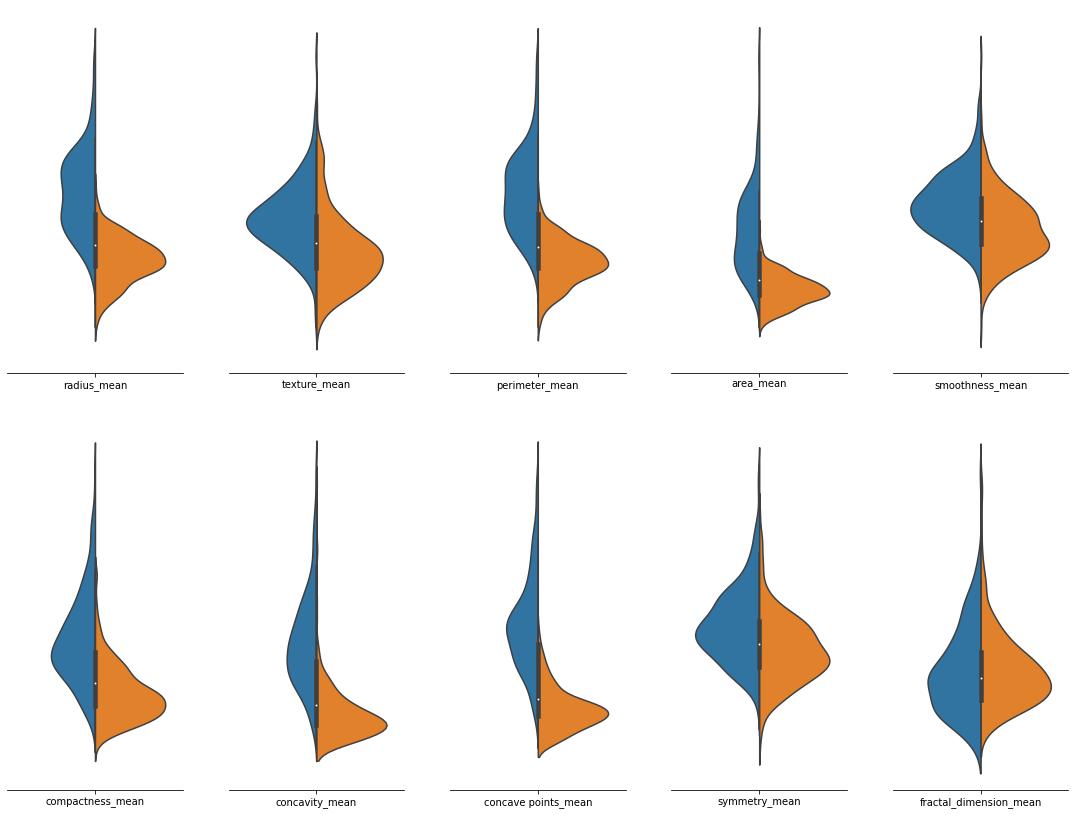

In [18]:
# plot the violinplots
subplot_generator(df=df_mean, y=y, plot='violinplot')

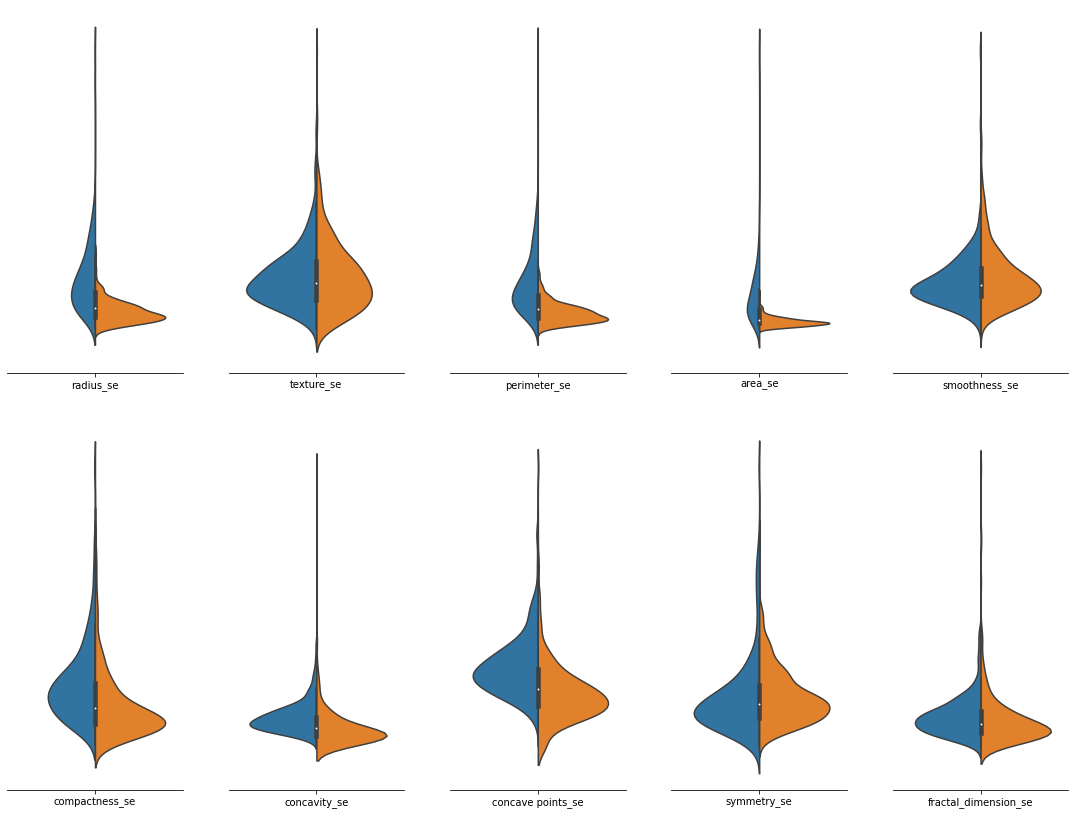

In [19]:
# plot the violinplots
subplot_generator(df=df_se, y=y, plot='violinplot')

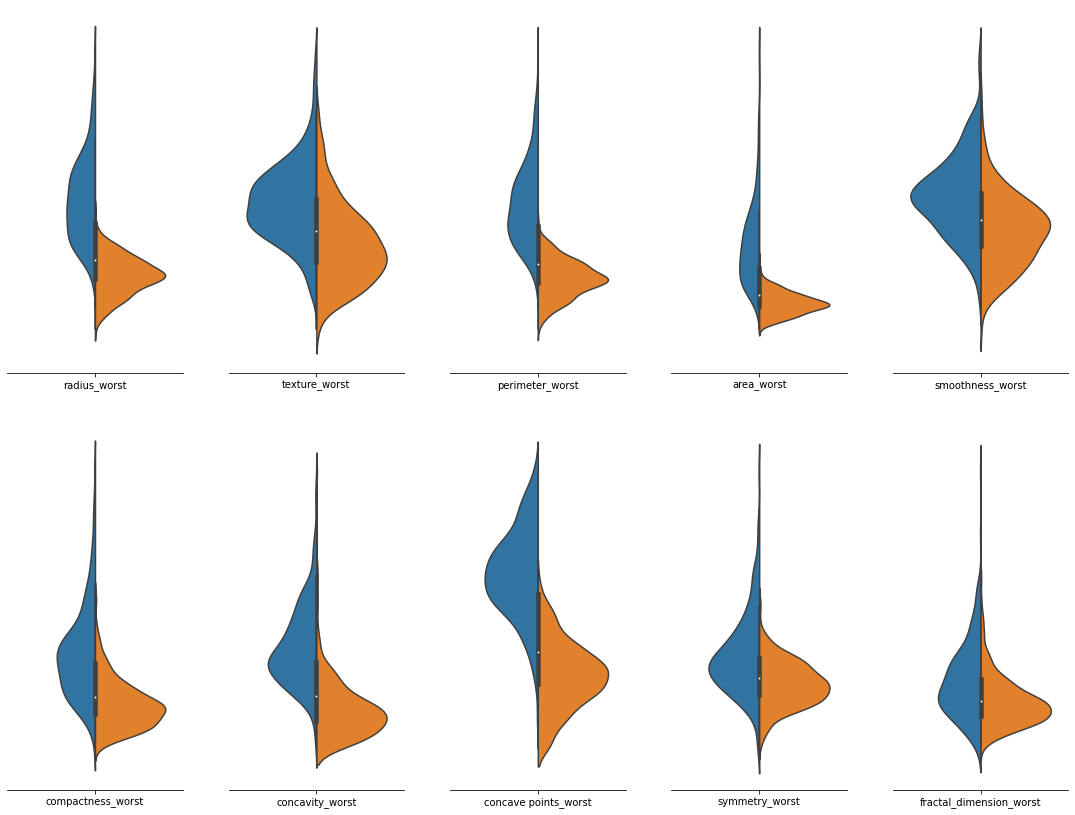

In [20]:
# plot the violinplots
subplot_generator(df=df_worst, y=y, plot='violinplot')

##### Swarm Plot

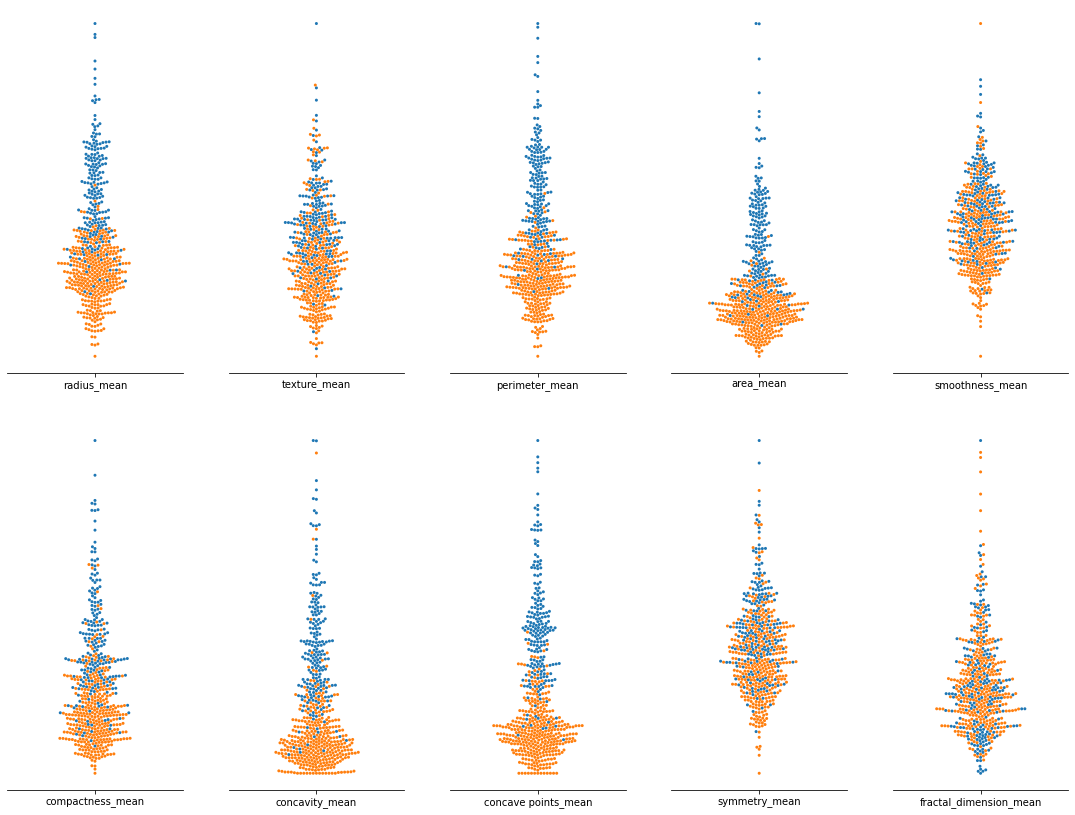

In [21]:
# plot the swarmplots
subplot_generator(df=df_mean, y=y, plot='swarmplot')

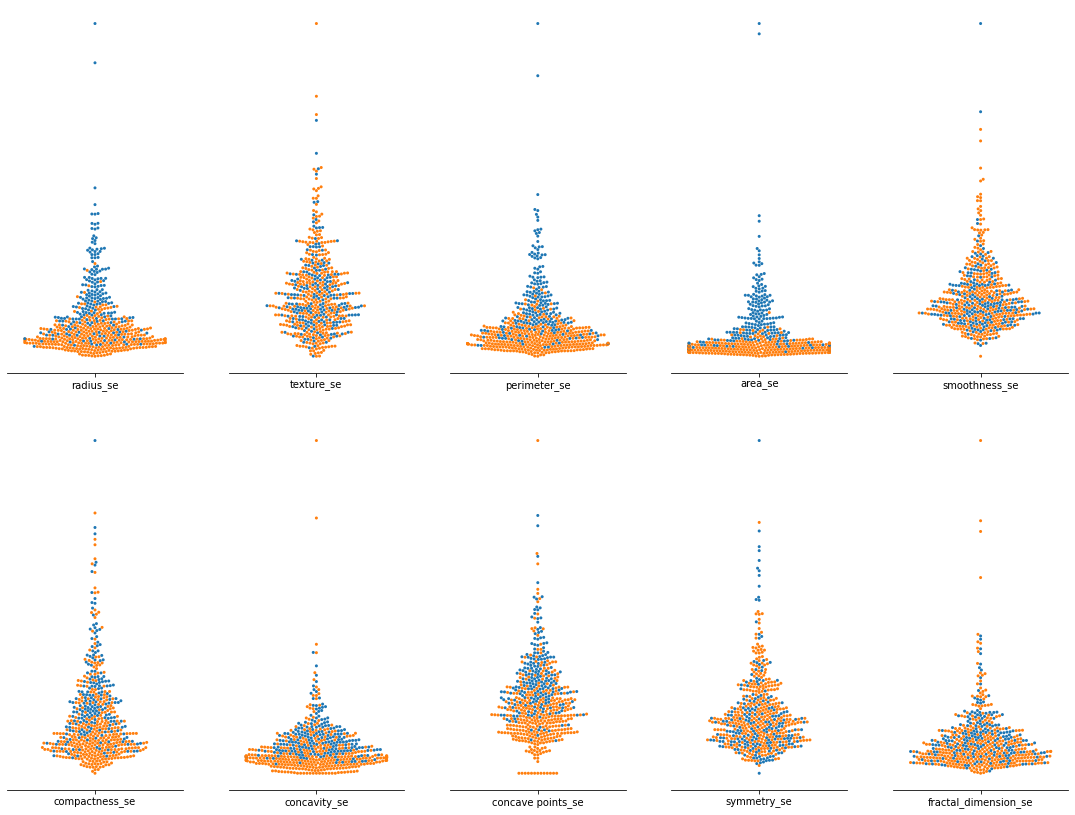

In [22]:
# plot the swarmplots
subplot_generator(df=df_se, y=y, plot='swarmplot')

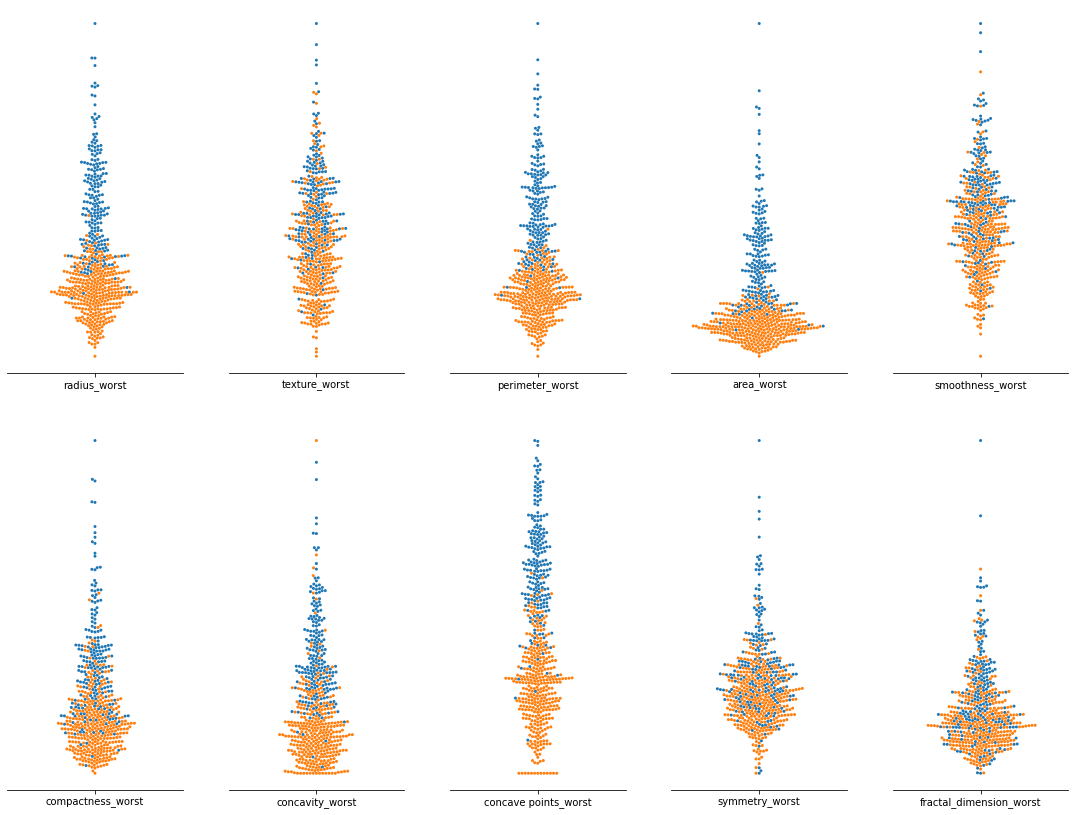

In [23]:
# plot the swarmplots
subplot_generator(df=df_worst, y=y, plot='swarmplot')

### Outliers

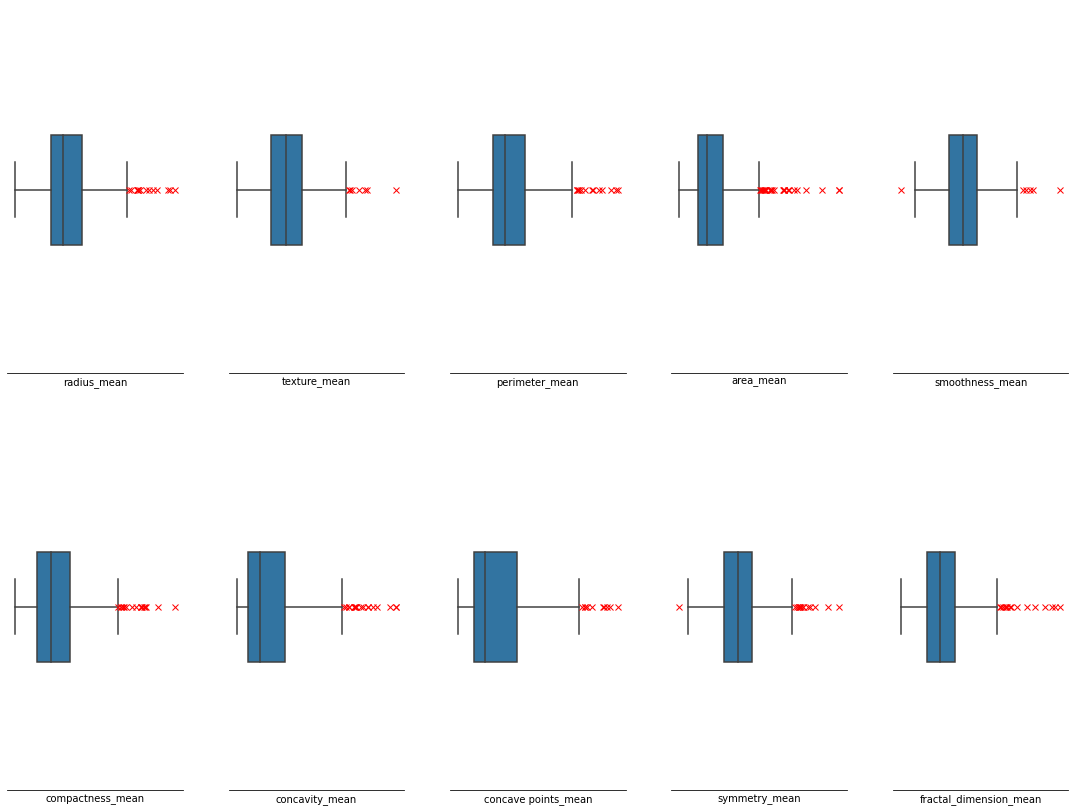

In [24]:
# plot the boxplot
subplot_generator(df=df_mean, plot='boxplot')

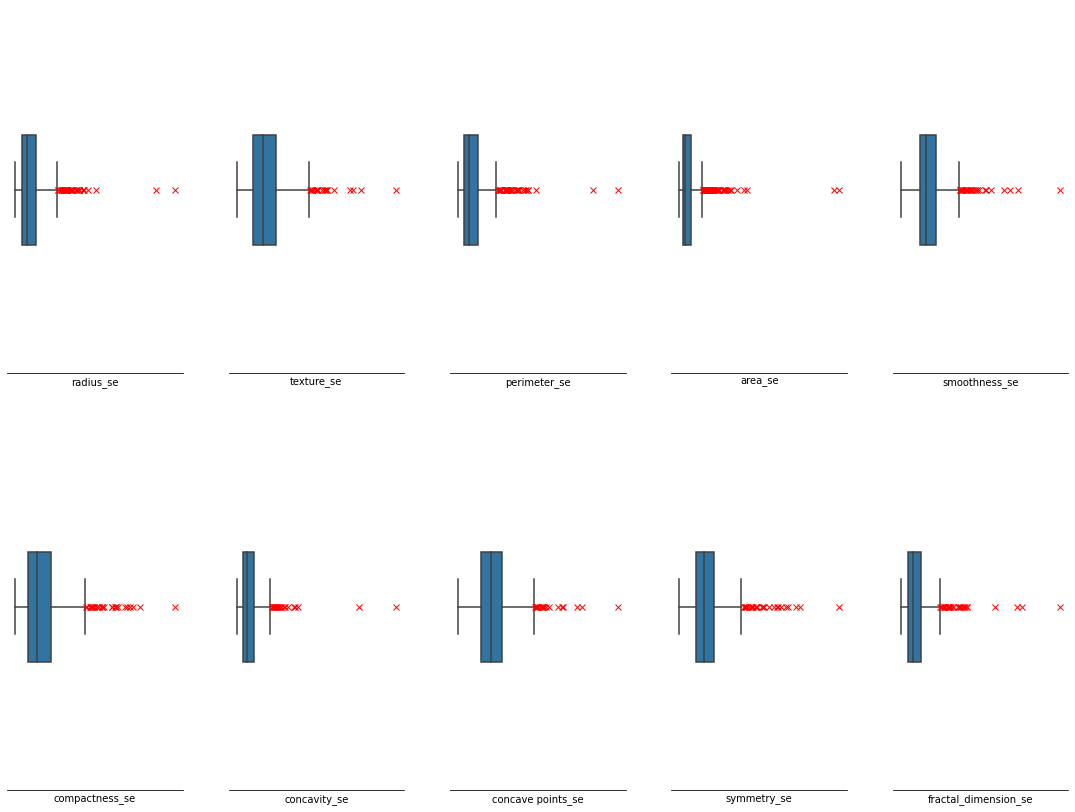

In [25]:
# plot the boxplot
subplot_generator(df=df_se, plot='boxplot')

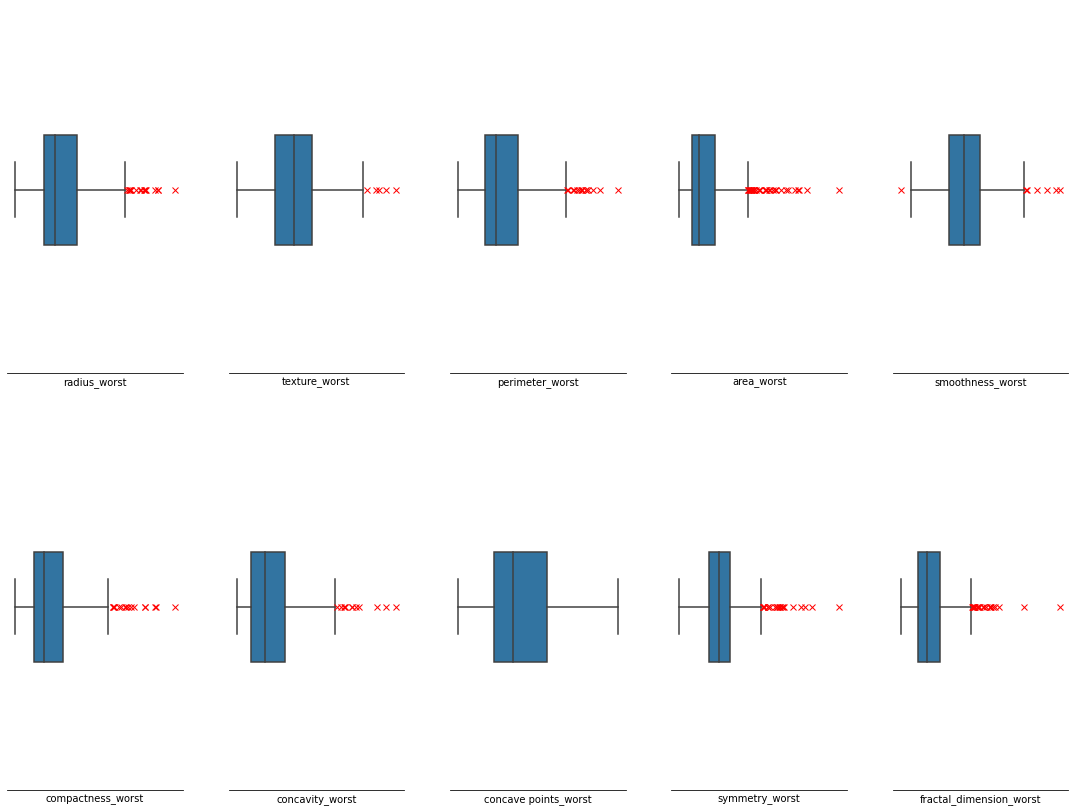

In [26]:
# plot the boxplot
subplot_generator(df=df_worst, plot='boxplot')

In [27]:
from sklearn.neighbors import LocalOutlierFactor

# find the outliers
y_pred = LocalOutlierFactor().fit_predict(df.drop(["diagnosis"], axis=1))

outlier_count = abs(sum(y_pred[y_pred < 1]))

print(f'The vanilla Local Outlier Factor identified {outlier_count} outliers ({round(outlier_count/len(df), 2)}%)' )

The vanilla Local Outlier Factor identified 29 outliers (0.05%)


### Correlation

In [28]:
# encoding the target variable  
df['diagnosis'] = df['diagnosis'].map({'B' : 0, 'M' : 1})

# convert it into a numeric variable
df['diagnosis'] = pd.to_numeric(df['diagnosis'])

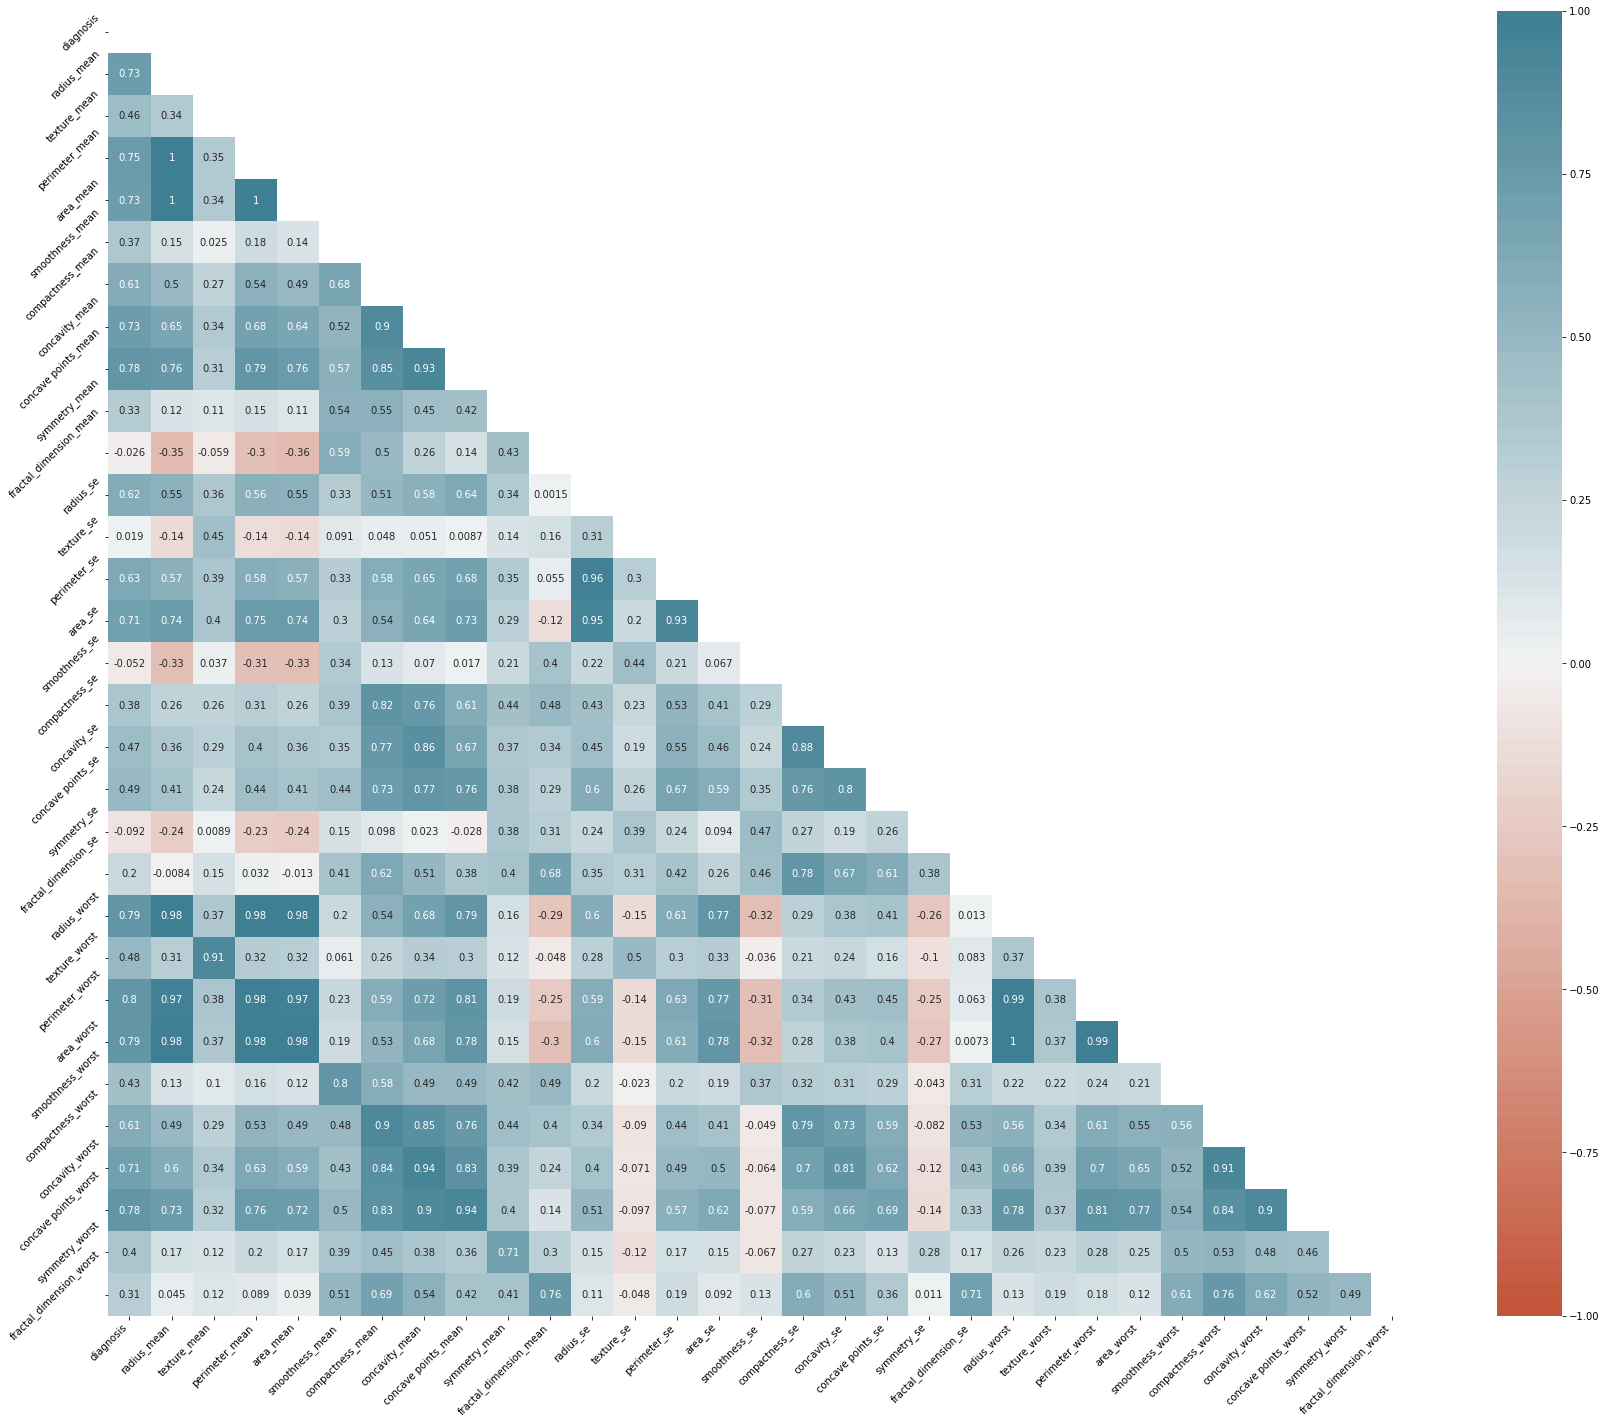

In [29]:
plt.figure(figsize=(30, 24))

# create the correlation matrix
corr_mat = df.corr(method='spearman')

# remove the upper diagonal
mask = np.zeros(corr_mat.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True

# set the plot dimension
fig = plt.figure(1, figsize=(14, 10))

ax = sns.heatmap(corr_mat, vmin=-1, vmax=1, center=0,
                 cmap=sns.diverging_palette(20, 220, n=100),
                 square=True, annot=True, mask=mask)

# modify the X and Y labels appearence
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_yticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# plot the graph
plt.show()

In [30]:
high_corr_feat_list = list(corr_mat[(abs(corr_mat['diagnosis']) >= 0.7) & (corr_mat.columns != 'diagnosis')].index)
high_corr_feat_list

['radius_mean',
 'perimeter_mean',
 'area_mean',
 'concavity_mean',
 'concave points_mean',
 'area_se',
 'radius_worst',
 'perimeter_worst',
 'area_worst',
 'concavity_worst',
 'concave points_worst']

|                     |        Feature 1       |     Feature 2     |        Feature 3        |      Feature 4     |     Feature 5    |
|---------------------|:----------------------:|:-----------------:|:-----------------------:|:------------------:|:----------------:|
| *radius_mean*       | *area_worst*           | *perimeter_worst* | *radius_worst*          | *area_mean*        | *perimeter_mean* |
| *concavity_mean*    | *concave_points_worst* | *concavity_worst* | *concavity_points_mean* | *compactness_mean* |                  |
| *radius_se*         | *perimeter_se*         | *area_se*         |                         |                    |                  |
| *compactness_mean*  | *compactness_worst*    |                   |                         |                    |                  |
| *compactness_worst* | *concavity_worst*      |                   |                         |                    |                  |
| *texture_mean*      | *texture_worst*        |                   |                         |                    |                  |

## Model Selection

In [31]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import LocalOutlierFactor, KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from skopt.sampler import Grid

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn import FunctionSampler

from sklearn.metrics import recall_score

In [32]:
def nested_cv(X: pd.DataFrame, y: pd.Series, cv_outer: StratifiedKFold, opt_search: BayesSearchCV, validation_result: bool) -> None:
    """
    Run the nested cross validation.
    """
    outer_results, inner_results = outer_loop(X=X, y=y, cv_outer=cv_outer, opt_search=opt_search, validation_result=validation_result)

    # print the CV overall results
    print(f'Recall | Validation Mean: {round(np.mean(inner_results), 3)}, Validation Std: {round(np.std(inner_results), 3)}')
    print(f'Recall | Test Mean: {round(np.mean(outer_results), 3)}, Test Std: {round(np.std(outer_results), 3)}')
    

def outer_loop(X: pd.DataFrame, y: pd.Series, cv_outer: StratifiedKFold, opt_search: BayesSearchCV, validation_result: bool) -> list:
    """
    Perform the outer loop split and per each fold, its inner loop.
    """
    outer_results, inner_results = [], []
    
    for i, (train_index, test_index) in enumerate(cv_outer.split(X, y), start=1):
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # start the Bayes search
        _ = opt_search.fit(X_train, y_train)

        # save the best model
        best_model = opt_search.best_estimator_

        # predict on the test set
        y_pred = best_model.predict(X_test)

        # calculate the recall on test set
        recall = recall_score(y_test, y_pred)
        
        # append the recall results
        outer_results.append(recall)
        inner_results.append(opt_search.best_score_)
        
        print_validation_results(i=i, opt_search=opt_search, recall=recall, validation_result=validation_result)
    
    return outer_results, inner_results


def print_validation_results(i: int, opt_search: BayesSearchCV, recall: float, validation_result: bool) -> None:
    """
    Print the validation results per each fold.
    """
    if validation_result:
        print(f'Fold {i}')
        print(f'Recall | Validation: {round(opt_search.best_score_, 3)}\tTest: {round(recall, 3)}')
        print('\n')
        print(f'Best Hyperparameter Combination:\n{opt_search.best_params_}')
        print('\n')

In [33]:
# set the inner and outer CV
cv_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
cv_inner = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

In [34]:
# set the dict with params to
# be passed onto the optimizer
optimizer_dict = {
        'n_initial_points' : 10,
        'initial_point_generator' : Grid(border="include")
        }

### Data Preprocessing

In [35]:
# split the columns into features and targets
X = df[df.columns.drop(['diagnosis'])]
y = df['diagnosis']

### Baseline Model

In [36]:
# create the pipeline
pipeline = Pipeline([
    ('clf', None)
])

In [37]:
# set the parameter search space for classifier 1
gnb_search = {
    'clf': Categorical([GaussianNB()]),
    'clf__var_smoothing': Real(1e-9, 2)
}

# set the parameter search space for classifier 2
svc_search = {
    'clf': Categorical([SVC()]),
    'clf__C': Real(1e-6, 1e+6, prior='log-uniform'),
    'clf__gamma': Real(1e-6, 1e+1, prior='log-uniform'),
    'clf__degree': Integer(1, 3),
    'clf__kernel': Categorical(['linear', 'poly', 'rbf'])
}

# set the parameter search space for classifier 3
log_search = {
    'clf': Categorical([LogisticRegression()]),
    'clf__C': Real(1e-5, 10),
    'clf__penalty': Categorical(['l2']),
    'clf__class_weight': Categorical([None, 'balanced']),
    'clf__solver': Categorical(['lbfgs', 'liblinear']),
    'clf__max_iter': [1000]
}

# set the parameter search space for classifier 4
rf_search = {
    'clf': Categorical([RandomForestClassifier()]),
    'clf__n_estimators': Integer(10, 200),
    'clf__criterion': Categorical(['gini', 'entropy']),
    'clf__min_samples_split': Integer(2, 200),
    'clf__min_samples_leaf': Integer(1, 200),
    'clf__min_impurity_decrease': Real(0, 1),
    'clf__max_features': Integer(1, 15)
}

# set the parameter search space for classifier 1
knn_search = {
    'clf': Categorical([KNeighborsClassifier()]),
    'clf__n_neighbors': Integer(2, 20, prior='log-uniform'),
    'clf__weights': Categorical(['uniform', 'distance']),
    'clf__leaf_size': Integer(30, 100),
    'clf__p': Integer(1, 2),
    'clf__algorithm': Categorical(['ball_tree', 'kd_tree', 'brute'])
}

In [38]:
# create a list of models
model_list = [
    gnb_search,
    svc_search,
    log_search,
    rf_search,
    knn_search
]

In [39]:
# set the number of searches to perform
search_num = 10

# create the search space by joining
# all of the classifiers that need to be optimized
search_space_list = [
    (log_search, search_num), 
    (svc_search, search_num), 
    (rf_search, search_num),
    (gnb_search, search_num),
    (knn_search, search_num)
]

In [40]:
# define the Bayesian search
opt_search = BayesSearchCV(
    estimator=pipeline,
    search_spaces=search_space_list,
    optimizer_kwargs=optimizer_dict,
    scoring='recall',
    cv=cv_inner,
    refit=True,
    return_train_score=True,
    random_state=42)

In [41]:
X, y

(     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
 0          17.99         10.38          122.80     1001.0          0.11840   
 1          20.57         17.77          132.90     1326.0          0.08474   
 2          19.69         21.25          130.00     1203.0          0.10960   
 3          11.42         20.38           77.58      386.1          0.14250   
 4          20.29         14.34          135.10     1297.0          0.10030   
 ..           ...           ...             ...        ...              ...   
 564        21.56         22.39          142.00     1479.0          0.11100   
 565        20.13         28.25          131.20     1261.0          0.09780   
 566        16.60         28.08          108.30      858.1          0.08455   
 567        20.60         29.33          140.10     1265.0          0.11780   
 568         7.76         24.54           47.92      181.0          0.05263   
 
      compactness_mean  concavity_mean  concave po

In [42]:
# %%time
# # enumerate splits
# nested_cv(X, y, cv_outer, opt_search, True)

### Baseline Model + Scaling

In [43]:
# create the pipeline with the scaler
pipeline = Pipeline([
    ('scaler', MinMaxScaler()), 
    ('clf', None)
])

In [44]:
# define the Bayesian search
opt_search = BayesSearchCV(
    estimator=pipeline,
    search_spaces=search_space_list,
    optimizer_kwargs=optimizer_dict,
    scoring='recall',
    cv=cv_inner,
    refit=True,
    return_train_score=True,
    random_state=42)

In [45]:
%%time
# enumerate splits
nested_cv(X, y, cv_outer, opt_search, False)

Recall | Validation Mean: 0.967, Validation Std: 0.004
Recall | Test Mean: 0.958, Test Std: 0.04
CPU times: user 6min 8s, sys: 46.3 s, total: 6min 54s
Wall time: 5min 44s


### Baseline Model + Scaling + Outlier Detection

In [46]:
def lof(X, y):
    """Find the outliers above the 1st percentile and remove them from both X and y."""
    model = LocalOutlierFactor()
    model.fit(X)
    # extract 
    lof_score = model.negative_outlier_factor_
    # find the 1st percentile
    percentile = np.quantile(lof_score, 0.01)

    return X[lof_score > percentile, :], y[lof_score > percentile]

In [47]:
# create the pipeline
pipeline = Pipeline([
    ('outlier_detector', FunctionSampler(func=lof)),
    ('scaler', MinMaxScaler()), 
    ('clf', None)
])

In [48]:
# define the Bayesian search
opt_search = BayesSearchCV(
    estimator=pipeline,
    search_spaces=search_space_list,
    optimizer_kwargs=optimizer_dict,
    scoring='recall',
    cv=cv_inner,
    refit=True,
    return_train_score=True,
    random_state=42)

In [49]:
%%time
# enumerate splits
nested_cv(X, y, cv_outer, opt_search, False)

Recall | Validation Mean: 0.969, Validation Std: 0.006
Recall | Test Mean: 0.957, Test Std: 0.05
CPU times: user 7min 32s, sys: 1min 3s, total: 8min 35s
Wall time: 7min 2s


### Baseline Model + Scaling + SMOTE

In [50]:
# create the pipeline
pipeline = Pipeline([
    ('smote', SMOTE(sampling_strategy='minority', random_state=42)),
    ('scaler', MinMaxScaler()), 
    ('clf', None)
])

# add SMOTE parameters
for d in model_list:
    d['smote__k_neighbors'] = Integer(2, 15)

In [51]:
# define the Bayesian search
opt_search = BayesSearchCV(
    estimator=pipeline,
    search_spaces=search_space_list,
    optimizer_kwargs=optimizer_dict,
    scoring='recall',
    cv=cv_inner,
    refit=True,
    return_train_score=True,
    random_state=42)

In [52]:
%%time
# enumerate splits
nested_cv(X, y, cv_outer, opt_search, False)

Recall | Validation Mean: 1.0, Validation Std: 0.0
Recall | Test Mean: 1.0, Test Std: 0.0
CPU times: user 10min 18s, sys: 60 s, total: 11min 18s
Wall time: 9min 52s
